In [66]:
import numpy as np;
import seaborn as sns;
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

%matplotlib notebook
plt.rcParams['figure.figsize'] = [8, 5]

In [67]:
random_avg = pd.read_csv("result-increasing-randoms-avg.txt")
threads_avg = pd.read_csv("result-increasing-threads-avg.txt")
threads_max = pd.read_csv("result-increasing-threads-max.txt")

In [68]:
def get_keys(data):
    col = list(data.columns[2:])
    res = []
    for i in col:
        res.append(i.split("[")[0])
    return set(res)

def get_average(data):
    col = list(data.columns)
    for i in range(2, len(col), 2):
        name = col[i].split("[")[0]+"[avg (s)]"
        data[name] = data.iloc[:,i:i+2].mean(axis=1)
    return data

def get_speedup(data):
    col = list(data.columns)
    for i in range(2, len(col)):
        data[col[i]+" [speedup]"] = data[col[i]].loc[0] / data[col[i]]
    return data

In [69]:
threads_max = get_average(threads_max)
threads_avg = get_average(threads_avg)
random_avg = get_average(random_avg)

threads_max = get_speedup(threads_max)
threads_avg = get_speedup(threads_avg)
random_avg = get_speedup(random_avg)

In [70]:
def errorfill(x, y, y_min, y_max, color=None, alpha_fill=0.3, ax=None, label=None):
    if color is None:
        color = next(ax._get_lines.prop_cycler)['color']
    ax.semilogx(x, y, basex = 2, color=color, label=label)
    ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
    ax.fill_between(x, y_max, y_min, color=color, alpha=alpha_fill)
    return ax

def add_plot(keys, data, x_id, y_id, y_min_id, y_max_id):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    for i in keys:
        x = data[x_id]
        y = data[i + y_id]
        y_min = data[i + y_min_id]
        y_max = data[i + y_max_id]
        errorfill(x, y, y_min, y_max, ax=ax, label=i)
    return ax

<IPython.core.display.Javascript object>


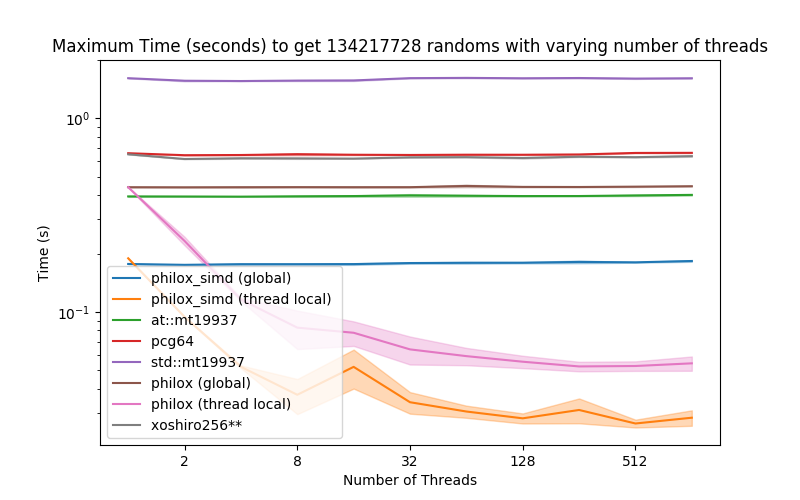

In [71]:
keys = get_keys(threads_max)

ax = add_plot(keys, threads_max, "Number of Threads", "[avg (s)]", "[best max (s)]", "[worst max (s)]")
ax.legend()
ax.set_yscale('log')
ax.set_xlabel("Number of Threads")
ax.set_title("Maximum Time (seconds) to get 134217728 randoms with varying number of threads")
ax.set_ylabel("Time (s)")
plt.show()

<IPython.core.display.Javascript object>


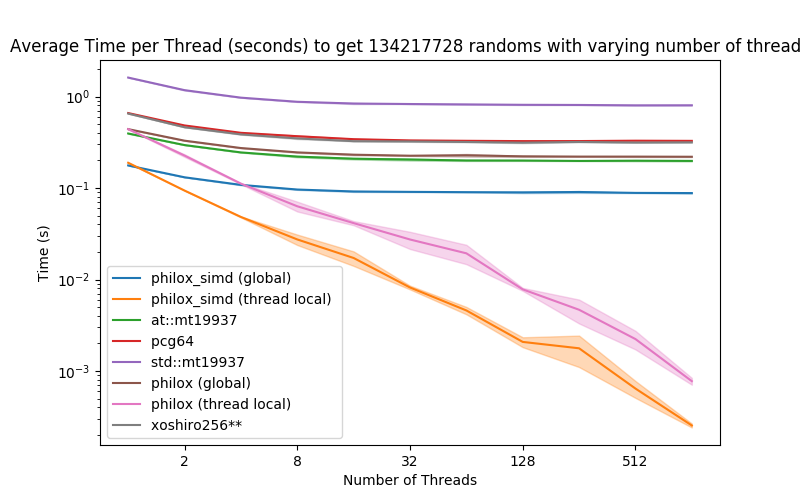

In [14]:
keys = get_keys(threads_avg)
ax = add_plot(keys, threads_avg, "Number of Threads", "[avg (s)]", "[best avg (s)]", "[worst avg (s)]")
ax.legend()
ax.set_yscale('log')
ax.set_xlabel("Number of Threads")
ax.set_title("Average Time per Thread (seconds) to get 134217728 randoms with varying number of threads")
ax.set_ylabel("Time (s)")
plt.show()

<IPython.core.display.Javascript object>


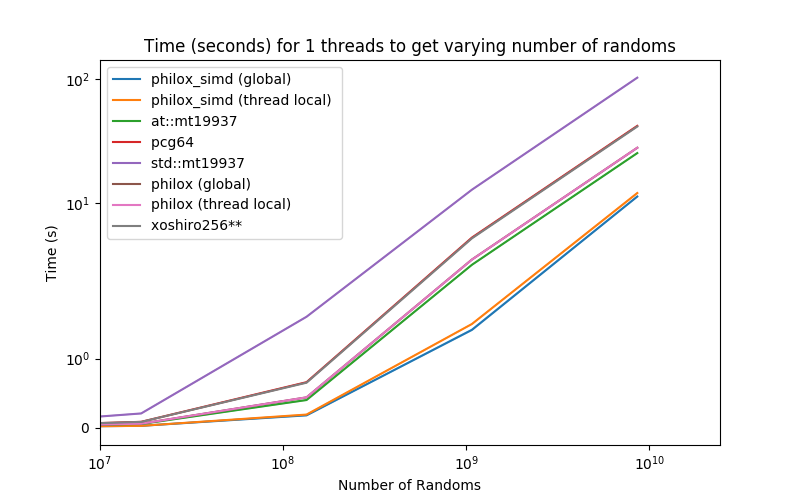

In [72]:
keys = get_keys(random_avg)
ax = add_plot(keys, random_avg, "Number of Randoms", "[avg (s)]", "[best avg (s)]", "[worst avg (s)]")
ax.legend()
ax.set_xlim(10000000)
ax.set_xscale('symlog')
ax.set_yscale('symlog')
ax.set_xlabel("Number of Randoms")
ax.set_title("Time (seconds) for 1 threads to get varying number of randoms")
ax.set_ylabel("Time (s)")
plt.show()

<IPython.core.display.Javascript object>


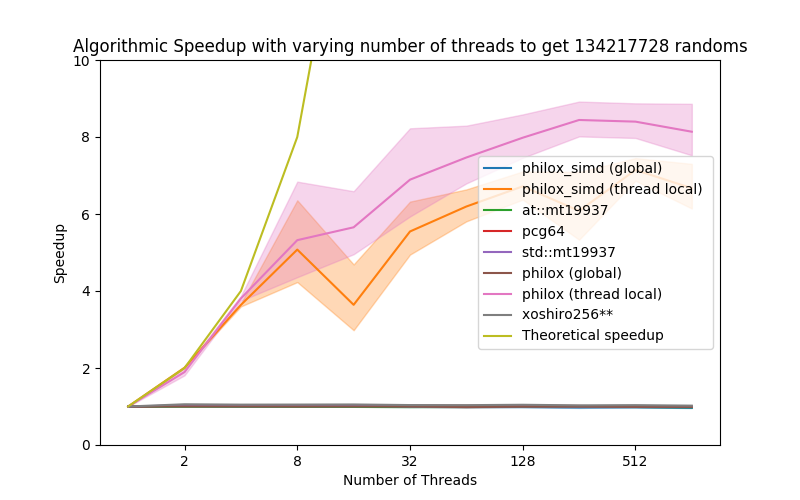

In [17]:
keys = get_keys(threads_max)
ax = add_plot(keys, threads_max, "Number of Threads", "[avg (s)] [speedup]", "[best max (s)] [speedup]", "[worst max (s)] [speedup]")
ax.plot(threads_max["Number of Threads"], threads_max["Number of Threads"], label="Theoretical speedup")
ax.legend()
ax.set_ylim(0, 10)
ax.set_xlabel("Number of Threads")
ax.set_title("Algorithmic Speedup with varying number of threads to get 134217728 randoms")
ax.set_ylabel("Speedup")
plt.show()

<IPython.core.display.Javascript object>


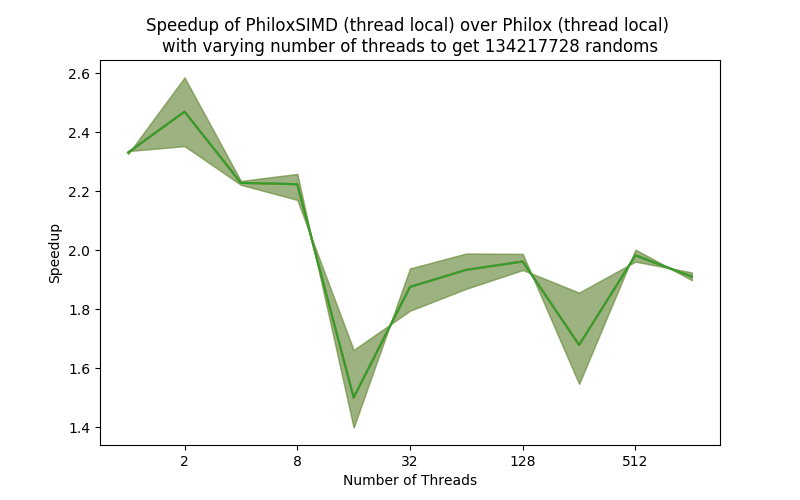

In [73]:
keys = ["philox (thread local) [best max (s)]",
        "philox_simd (thread local) [best max (s)]",
        "philox (thread local) [worst max (s)]",
        "philox_simd (thread local) [worst max (s)]",
        "philox (thread local) [avg (s)]",
        "philox_simd (thread local) [avg (s)]"]

for i in range(0, len(keys), 2):
    name = "["+keys[i].split("[")[-1]
    threads_max["philox vs philox_simd "+name] = threads_max[keys[i]] / threads_max[keys[i+1]]

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
for i in range(3):
    x = threads_max["Number of Threads"]
    y = threads_max["philox vs philox_simd [avg (s)]"]
    y_min = threads_max["philox vs philox_simd [best max (s)]"]
    y_max = threads_max["philox vs philox_simd [worst max (s)]"]
    errorfill(x, y, y_min, y_max, ax=ax)

ax.set_xlabel("Number of Threads")
ax.set_title("Speedup of PhiloxSIMD (thread local) over Philox (thread local) \nwith varying number of threads to get 134217728 randoms")
ax.set_ylabel("Speedup")
plt.show()